# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# exporting dataset
user = pd.read_csv('/home/bashar/Downloads/User - Event Raw Dataset.csv')
event = pd.read_csv('/home/bashar/Downloads/Event Description Mapping.csv')

In [3]:
user.head()

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk


In [4]:
# renaming 'event' column name to merge data
user = user.rename(columns = {'event' : 'Event'})

In [5]:
event.head()

,Event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General


In [6]:
# merging both the dataset using column name 'Event'
df = pd.merge(user, event, on = 'Event', how = 'inner')
df.head()

,created_at_time,Event,org_id,project_id,user_id,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General
1,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General
2,2022-03-22 20:39:20,project_creation_request_success,ORG-iluuim4club,PRJjial8edi2x63,USRcsxgn7-vnztk,Successfully creating a new project,General
3,2022-03-27 0:53:46,project_creation_request_success,ORG-o3wg0wxgykk,PRJcegaw8o7utm0,USRhnr-cha95rvm,Successfully creating a new project,General
4,2022-03-09 23:41:45,project_creation_request_success,ORG-t4fhiiw79ej,PRJnv-cmydt-u3j,USR-w9-buf-hzdi,Successfully creating a new project,General


In [7]:
# dropping all duplicate if there
df = df.drop_duplicates()

In [8]:
# checking shape of the data
df.shape

(41177, 7)

In [9]:
# checking for null values
df.isnull().sum()

created_at_time      0
Event                0
org_id               0
project_id         141
user_id              0
Description          0
Section              0
dtype: int64

In [10]:
# checking data types
df.dtypes

created_at_time    object
Event              object
org_id             object
project_id         object
user_id            object
Description        object
Section            object
dtype: object

In [11]:
# converting 'created_at_time' column to datetime data type
df['created_at_time'] = pd.to_datetime(df['created_at_time'])

# Checking for data anamolies

In [12]:
df['Section'].unique()

array(['General', 'Task', 'Material', 'Labour'], dtype=object)

In [13]:
df['Event'].unique()

array(['project_creation_request_success', 'task_log_create_success',
       'task_creation', 'stock_material_updated', 'new_material_added',
       'indent_create_success', 'generate_report_success',
       'dashboard_view_success', 'add_attendance_success',
       'material_profile_material_load', 'attendance_list_accessed',
       'thread_create_success', 'comment_create_success',
       'channel_message_sent', 'assigned_people_on_task',
       'image_upload_success', 'followup_button_clicked'], dtype=object)

In [14]:
df['Description'].unique()

array(['Successfully creating a new project',
       'Successfully creating an update on a particular task',
       'Successfully creating a task', 'Updating Stock in the inventory',
       "Material Added to Inventory in 'Material' Section",
       'Material Added to Inventory',
       'Report for the overall work done generated for a particular project/org',
       'Dashboard Page Loading for a particular organisation',
       'Successfully adding attendance of a person once',
       'Material list page opens on clicking this button',
       'Attendance list page opens on clicking this button',
       'Successfully creating an Issue against a line item',
       'Comment Created ', 'Message sent on chat feature',
       'Assigned another person on a particular task',
       'User uploads an image on the app',
       'Clicking Followup on a particular task/tasklog'], dtype=object)

In [15]:
# in the 'Event' column replacing '_' with blank space
df['Event'] = df['Event'].str.replace('_', ' ')
df.head()

,created_at_time,Event,org_id,project_id,user_id,Description,Section
0,2022-04-20 18:24:30,project creation request success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General
1,2022-04-25 23:28:23,project creation request success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General
2,2022-03-22 20:39:20,project creation request success,ORG-iluuim4club,PRJjial8edi2x63,USRcsxgn7-vnztk,Successfully creating a new project,General
3,2022-03-27 00:53:46,project creation request success,ORG-o3wg0wxgykk,PRJcegaw8o7utm0,USRhnr-cha95rvm,Successfully creating a new project,General
4,2022-03-09 23:41:45,project creation request success,ORG-t4fhiiw79ej,PRJnv-cmydt-u3j,USR-w9-buf-hzdi,Successfully creating a new project,General


# Exploratory Data Analysis

In [16]:
df['user_id'].nunique()

543

In [17]:
df['project_id'].nunique()

914

In [18]:
df['Event'].nunique()

17

In [19]:
# extracting the start and end date of the dataset
start_date =  df['created_at_time'].min()
end_date =  df['created_at_time'].max()
print(f'Start Date: {start_date}')
print(f'End Date : {end_date}')

Start Date: 2022-01-01 22:59:53
End Date : 2023-02-23 14:10:43


### What were the most common user events?
 

In [20]:
# calculating the frequency of each event type.
events = df["Event"].value_counts()
events

Event
material profile material load      10114
add attendance success               7569
stock material updated               7272
task log create success              5010
comment create success               2054
channel message sent                 1867
generate report success              1701
task creation                        1602
new material added                   1243
attendance list accessed              837
project creation request success      651
dashboard view success                622
assigned people on task               290
indent create success                 158
thread create success                  93
image upload success                   70
followup button clicked                24
Name: count, dtype: int64

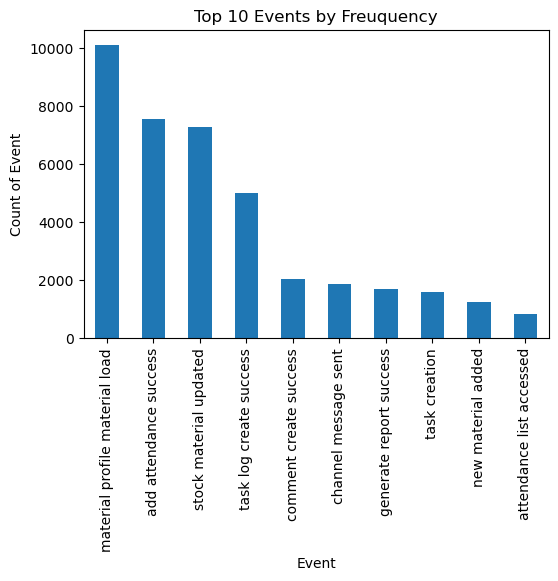

In [21]:
# visualizing the to 10 most frequent events
top_event = events.nlargest(10)

fig= plt.figure(figsize=(6, 4))
top_event.plot(kind='bar')
plt.title('Top 10 Events by Freuquency')
plt.xlabel('Event')
plt.xticks(rotation=90)
plt.ylabel('Count of Event')
plt.show()

### Who are the top users, and which events are they interacting with most frequently?

In [22]:
# extracting top 10 users with their events
per_user_event = df.groupby(['user_id','Event']).size().reset_index(name = 'total_events')
top_10_users = per_user_event.nlargest(10,'total_events')
top_10_users

,user_id,Event,total_events
772,USR509149973276,material profile material load,5438
774,USR509149973276,stock material updated,4057
578,USR395096428126,material profile material load,1393
1026,USR659222931763,stock material updated,1017
1023,USR659222931763,material profile material load,834
1163,USR775645688998,add attendance success,794
54,USR031919518153,add attendance success,587
188,USR120703039949,add attendance success,563
1042,USR660555701919,task log create success,553
581,USR395096428126,stock material updated,507


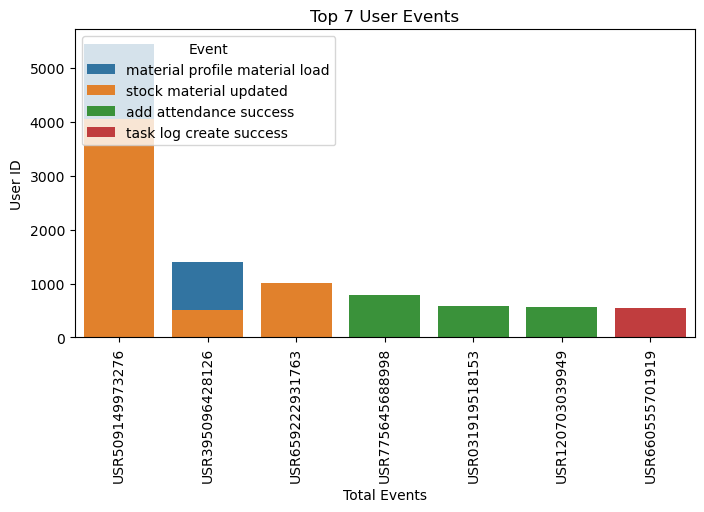

In [23]:
# plotting bar chart
plt.figure(figsize=(8,4))
sns.barplot(data=top_10_users, x='user_id', y='total_events', hue='Event', dodge=False)

plt.title('Top 7 User Events')
plt.xlabel('Total Events')
plt.ylabel('User ID')
plt.xticks(rotation = 90)
plt.legend(title='Event')
plt.show()

### Are there specific times or days when user activity is highest?

In [24]:
# extracting all the possible time components
df['month'] = df['created_at_time'].dt.month_name()
df['year'] = df['created_at_time'].dt.year
df['hour'] = df['created_at_time'].dt.hour
df['day'] = df['created_at_time'].dt.day
df['weekday'] = df['created_at_time'].dt.day_name()
df['week'] = df['created_at_time'].dt.isocalendar().week

In [25]:
df.head()

,created_at_time,Event,org_id,project_id,user_id,Description,Section,month,year,hour,day,weekday,week
0,2022-04-20 18:24:30,project creation request success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General,April,2022,18,20,Wednesday,16
1,2022-04-25 23:28:23,project creation request success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General,April,2022,23,25,Monday,17
2,2022-03-22 20:39:20,project creation request success,ORG-iluuim4club,PRJjial8edi2x63,USRcsxgn7-vnztk,Successfully creating a new project,General,March,2022,20,22,Tuesday,12
3,2022-03-27 00:53:46,project creation request success,ORG-o3wg0wxgykk,PRJcegaw8o7utm0,USRhnr-cha95rvm,Successfully creating a new project,General,March,2022,0,27,Sunday,12
4,2022-03-09 23:41:45,project creation request success,ORG-t4fhiiw79ej,PRJnv-cmydt-u3j,USR-w9-buf-hzdi,Successfully creating a new project,General,March,2022,23,9,Wednesday,10


In [26]:
# created a function to extract time of day
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    elif x in range(16,22):
        return "Evening"
    else:
        return "Late night"

In [27]:
# applied the above created function to extract time of day
df["time_of_day"] = df["hour"].apply(time_of_day)
df.head()

,created_at_time,Event,org_id,project_id,user_id,Description,Section,month,year,hour,day,weekday,week,time_of_day
0,2022-04-20 18:24:30,project creation request success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General,April,2022,18,20,Wednesday,16,Evening
1,2022-04-25 23:28:23,project creation request success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General,April,2022,23,25,Monday,17,Late night
2,2022-03-22 20:39:20,project creation request success,ORG-iluuim4club,PRJjial8edi2x63,USRcsxgn7-vnztk,Successfully creating a new project,General,March,2022,20,22,Tuesday,12,Evening
3,2022-03-27 00:53:46,project creation request success,ORG-o3wg0wxgykk,PRJcegaw8o7utm0,USRhnr-cha95rvm,Successfully creating a new project,General,March,2022,0,27,Sunday,12,Late night
4,2022-03-09 23:41:45,project creation request success,ORG-t4fhiiw79ej,PRJnv-cmydt-u3j,USR-w9-buf-hzdi,Successfully creating a new project,General,March,2022,23,9,Wednesday,10,Late night


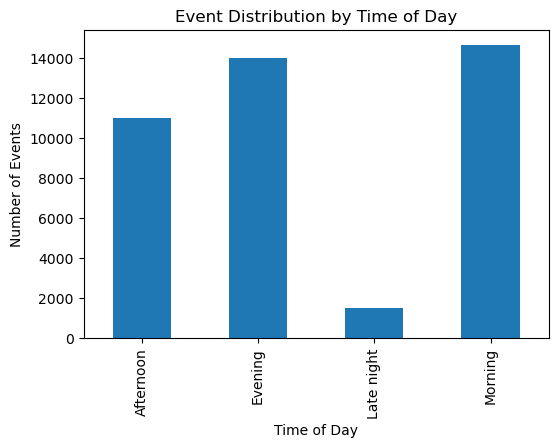

In [28]:
# extracting number of events happening at the time of day

time_of_day_counts = df['time_of_day'].value_counts().sort_index()

# Plotting the number of events by time of day
time_of_day_counts.plot(kind='bar', figsize=(6,4))
plt.title('Event Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Events')
plt.show()


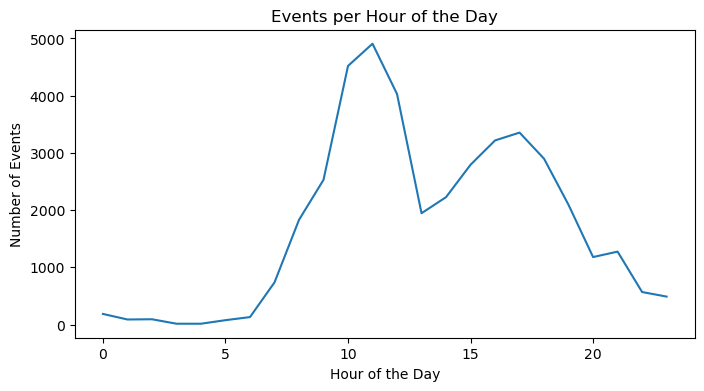

In [29]:
# extracting number of events happening per hour of the day
events_per_hour = df.groupby('hour').size()

# Plotting the number of events by time of day
plt.figure(figsize=(8,4))
events_per_hour.plot(kind='line')
plt.title('Events per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

In [30]:
# extracting number of events happening per Day of the Week

events_per_weekday = df.groupby('weekday').size()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
events_per_weekday = events_per_weekday.reindex(weekday_order)

events_per_weekday

weekday
Monday       6041
Tuesday      6274
Wednesday    6408
Thursday     6146
Friday       6498
Saturday     6045
Sunday       3765
dtype: int64

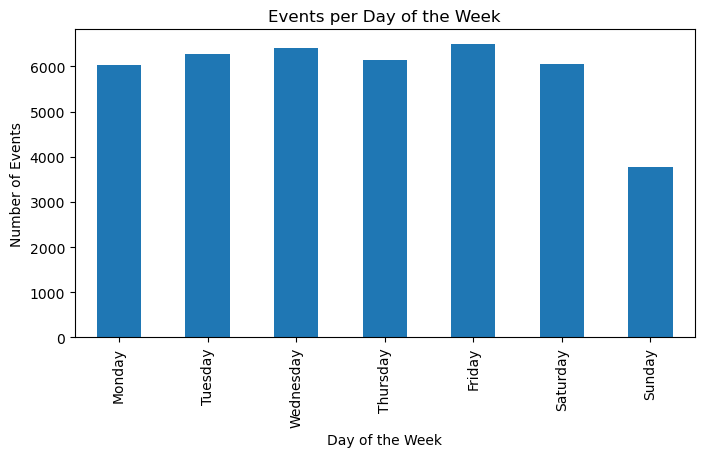

In [31]:
# visualizing number of events each day of the week
plt.figure(figsize=(8,4))
events_per_weekday.plot(kind='bar')
plt.title('Events per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.show()

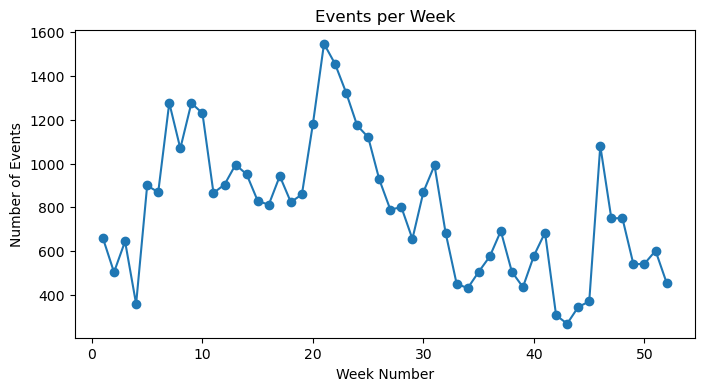

In [32]:
# numbeer of events happening per week
events_per_week = df.groupby('week').size()

# plotting line chart
plt.figure(figsize=(8,4))
events_per_week.plot(kind='line', marker = 'o')
plt.title('Events per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Events')
plt.show()

### What was the trend of events throughout the month?

In [33]:
# extracting number of events happened for each month over the year
events_per_month = df.groupby(['year', 'month']).size()
events_per_month

year  month    
2022  April        4079
      August       2839
      December     2583
      February     2726
      January       922
      July         3413
      June         5284
      March        4465
      May          4893
      November     2805
      October      2008
      September    2303
2023  February     1379
      January      1478
dtype: int64

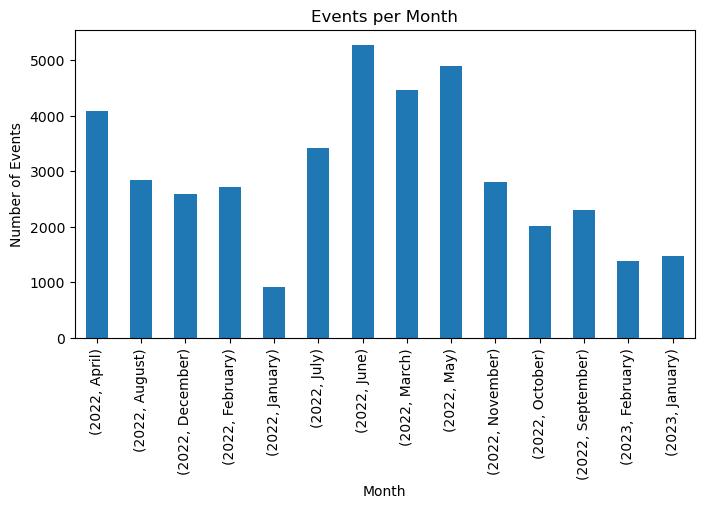

In [34]:
# plotting graph to visualize
plt.figure(figsize=(8, 4))
events_per_month.plot(kind='bar', stacked=True)
plt.title('Events per Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.show()


### How user changing over each month? 

In [35]:

monthly_counts = df.groupby(['year', 'month']).size().reset_index(name = 'curr_month_users')
# Define custom month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort dataframe by month order (assuming 'month' column has abbreviations)
# Convert 'month' column to categorical with custom order
monthly_counts['month'] = pd.Categorical(monthly_counts['month'], categories=month_order, ordered=True)

# Sort DataFrame by 'month'
monthly_counts = monthly_counts.sort_values(by=['year','month'])
monthly_counts

,year,month,curr_month_users
4,2022,January,922
3,2022,February,2726
7,2022,March,4465
0,2022,April,4079
8,2022,May,4893
6,2022,June,5284
5,2022,July,3413
1,2022,August,2839
11,2022,September,2303
10,2022,October,2008


In [36]:
monthly_counts['prev_month_users'] = monthly_counts['curr_month_users'].shift(1).fillna(0).astype(int)
monthly_counts.head()

,year,month,curr_month_users,prev_month_users
4,2022,January,922,0
3,2022,February,2726,922
7,2022,March,4465,2726
0,2022,April,4079,4465
8,2022,May,4893,4079


In [37]:
# calculating changing of users over the month
monthly_counts['difference'] = monthly_counts['curr_month_users'] - monthly_counts['prev_month_users']
monthly_counts.head()


,year,month,curr_month_users,prev_month_users,difference
4,2022,January,922,0,922
3,2022,February,2726,922,1804
7,2022,March,4465,2726,1739
0,2022,April,4079,4465,-386
8,2022,May,4893,4079,814


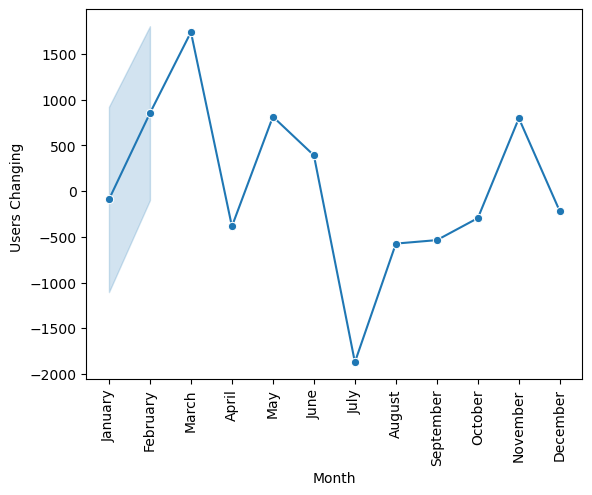

In [38]:
# plotting line chart
sns.lineplot(data = monthly_counts, x = 'month', y = 'difference',marker = 'o')
plt.xlabel('Month')
plt.ylabel('Users Changing ')
plt.xticks(rotation = 90)
plt.show()

### What is the average number of events per user?

In [39]:
# Calculate the number of events per user
user_event_counts = df['user_id'].value_counts()

# Calculate the average number of events per user
average_events_per_user = user_event_counts.mean()

print(f"The average number of events per user is {average_events_per_user:.0f}.")

The average number of events per user is 76.


### Who are the top 10 active users? 

In [40]:
# Top 10 most active users
top_users = user_event_counts.head(10)

print("Top 10 most active users and their event counts:")
print(top_users)


Top 10 most active users and their event counts:
user_id
USR509149973276    9594
USR395096428126    2608
USR659222931763    2029
USR594255074022    1308
USR660555701919    1280
USR658789223695    1176
USR120703039949    1149
USR912394666892    1139
USR181303348512     970
USRkiz6dyjgdxwh     967
Name: count, dtype: int64


### How users engaging over the day? 

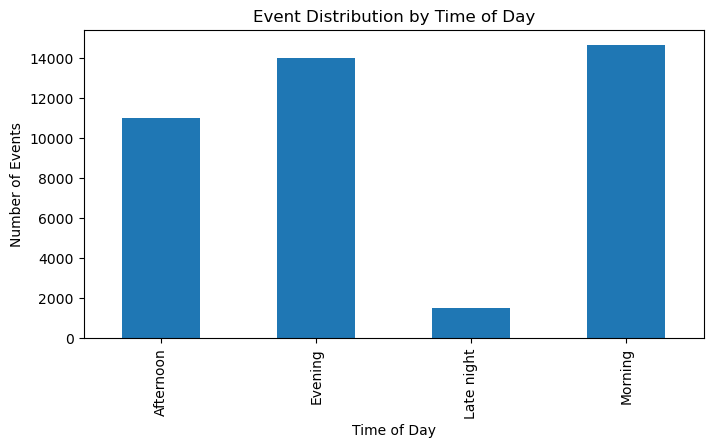

In [41]:
# Count events by time of day
time_of_day_counts = df['time_of_day'].value_counts().sort_index()

# Plotting the distribution of events by time of day
time_of_day_counts.plot(kind='bar', figsize=(8,4))
plt.title('Event Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Events')
plt.show()


### Which are the top 10 projects?

In [42]:
# Calculate the number of events per project
project_event_counts = df['project_id'].value_counts()

# Print the counts
print(project_event_counts)


project_id
PRJ256203650640    12820
PRJppirvslunbh9     1779
PRJ63dg0jj0k-vo     1481
PRJ8p2m3wyqmzs7     1348
PRJ355445863893     1280
                   ...  
PRJarqgmqvirghm        1
PRJcxanqq0kw-wt        1
PRJ5xn79l8d2us2        1
PRJ6a4cakcem56k        1
PRJu503rci797ws        1
Name: count, Length: 914, dtype: int64


In [43]:
# calculating top 10 active projects
top_projects = project_event_counts.head(10)

print("Top 10 most active projects and their event counts:")
print(top_projects)


Top 10 most active projects and their event counts:
project_id
PRJ256203650640    12820
PRJppirvslunbh9     1779
PRJ63dg0jj0k-vo     1481
PRJ8p2m3wyqmzs7     1348
PRJ355445863893     1280
PRJ236274665952     1227
PRJ924458474360     1148
PRJ060799956494     1062
PRJxgi6rhgey7i1      984
PRJ907457431360      627
Name: count, dtype: int64


### Which events were performed mostly through out the day?

In [44]:
# calculating number of events occoured throughout the day
day_time = df.groupby(['time_of_day','Event']).agg({'user_id':'count'}).reset_index()
most_activites = day_time.nlargest(10,'user_id')

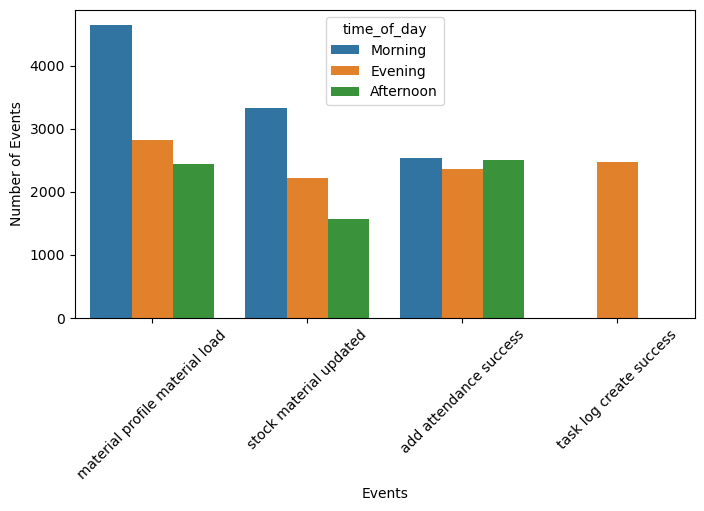

In [45]:
plt.figure(figsize=(8, 4))
sns.barplot(data =most_activites, x = 'Event', y = 'user_id', hue = 'time_of_day' )
plt.xlabel('Events')
plt.ylabel('Number of Events')
plt.xticks(rotation = 45)
plt.show()

###  What is the number of events occurring in each section?

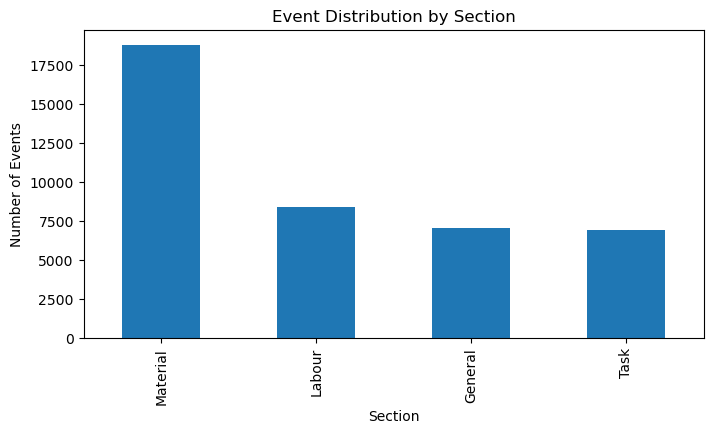

In [46]:
# counting the number of events per section
section_counts = df['Section'].value_counts()

# Plotting the distribution of events by section
section_counts.plot(kind='bar', figsize=(8,4))
plt.title('Event Distribution by Section')
plt.xlabel('Section')
plt.ylabel('Number of Events')
plt.show()


### What percentage of users complete key actions?

In [49]:
# calculating total unique users
total_users = df['user_id'].nunique()
print(f"Total number of unique users: {total_users}")

# calculating the number of unique users who performed each key action
project_created = df[df['Event'] == 'project creation request success']['user_id'].nunique()
report_generated = df[df['Event'] == 'generate report success']['user_id'].nunique()

print(f"Number of users who created a project: {project_created}")
print(f"Number of users who generated a report: {report_generated}")

# calculating the completion rate for each key action
project_creation_rate = (project_created / total_users) * 100
report_generation_rate = (report_generated / total_users) * 100
others = total_users - max(project_created, report_generated)


print(f"Project creation completion rate: {project_creation_rate:.2f}%")
print(f"Report generation completion rate: {report_generation_rate:.2f}%")


Total number of unique users: 543
Number of users who created a project: 401
Number of users who generated a report: 244
Project creation completion rate: 73.85%
Report generation completion rate: 44.94%


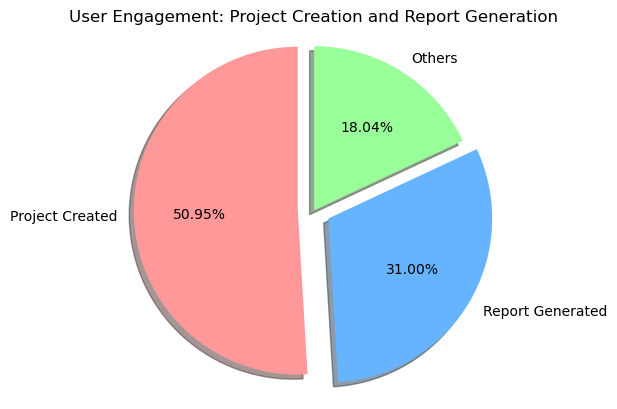

In [48]:
# plotting pie chart of project creation and report generation
labels = ['Project Created', 'Report Generated', 'Others']
sizes = [project_created, report_generated, others]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.1, 0)  # explode 1st and 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.title('User Engagement: Project Creation and Report Generation')
plt.show()
